In [1]:
%pip install umap

Note: you may need to restart the kernel to use updated packages.


In [2]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical


In [3]:
"""Now below here we are going to change our working directory to the data directory
"""

os.chdir('utkface_aligned_cropped')
os.chdir('UTKFace')


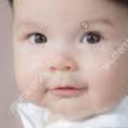

In [4]:
im =Image.open('1_0_0_20161219140627985.jpg.chip.jpg').resize((128,128))
im

In [5]:
onlyfiles = os.listdir()
print("Here we have loading all images directories ")


Here we have loading all images directories 


In [6]:
len(onlyfiles)

23708

In [7]:
shuffle(onlyfiles)
gender = [i.split('_')[1] for i in onlyfiles]

1. I would like to make clear that the image data is in its name means the first box of the second cell, the second gender, the second one, so the first step is that we are trying to separate the labels from the images so that they are stored in the classes as much as we need them
2. We can split the data into Gender Classes - 0 Male 1 Female


In [8]:
classes = []
for i in gender:
    i = int(i)
    classes.append(i)



**CONVERT IMAGES TO VECTORS**

In [10]:
X_data =[]
for file in onlyfiles:
    face = cv2.imread(file)
    face = cv2.resize(face, (28, 28) )
    X_data.append(face)


X = np.squeeze(X_data)

print(X.shape)

# normalize data
X = X.astype('float32')
X /= 255

print("normalized data")

print("Before Categorizing: ",classes[:10])

categorical_labels = to_categorical(classes, num_classes=2)

print("After")
categorical_labels[:10]


(23708, 28, 28, 3)
normalized data
Before Categorizing:  [0, 0, 0, 1, 1, 1, 0, 1, 1, 1]
After


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [11]:
(x_train, y_train), (x_test, y_test) = (X[:15008],categorical_labels[:15008]) , (X[15008:] , categorical_labels[15008:])
(x_valid , y_valid) = (x_test[:7000], y_test[:7000])
(x_test, y_test) = (x_test[7000:], y_test[7000:])


In [12]:
len(x_train)+len(x_test) + len(x_valid) == len(X)


True

In [21]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=28, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))



model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))

# Take a look at the model summary
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 28)        364       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 28)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 14, 14, 28)        0         
                                                                 
 flatten_4 (Flatten)         (None, 5488)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               702592    
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                      

In [22]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [23]:
model.fit(x_train,
         y_train,
         batch_size=100,
         epochs=25,
         validation_data=(x_valid, y_valid))

Epoch 1/25
151/151 [==============================] - 22s 108ms/step - loss: 0.5372 - accuracy: 0.7306 - val_loss: 0.4244 - val_accuracy: 0.8147
Epoch 2/25
151/151 [==============================] - 15s 98ms/step - loss: 0.4046 - accuracy: 0.8250 - val_loss: 0.3697 - val_accuracy: 0.8414
Epoch 3/25
151/151 [==============================] - 15s 100ms/step - loss: 0.3645 - accuracy: 0.8384 - val_loss: 0.3310 - val_accuracy: 0.8587
Epoch 4/25
151/151 [==============================] - 15s 99ms/step - loss: 0.3364 - accuracy: 0.8489 - val_loss: 0.3158 - val_accuracy: 0.8643
Epoch 5/25
151/151 [==============================] - 16s 104ms/step - loss: 0.3202 - accuracy: 0.8585 - val_loss: 0.3051 - val_accuracy: 0.8679
Epoch 6/25
151/151 [==============================] - 15s 99ms/step - loss: 0.3069 - accuracy: 0.8629 - val_loss: 0.2949 - val_accuracy: 0.8676
Epoch 7/25
151/151 [==============================] - 15s 98ms/step - loss: 0.2962 - accuracy: 0.8683 - val_loss: 0.2858 - val_accura

In [24]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8958823680877686


In [25]:
labels =["Male",  # index 0
        "Female",      # index 1
        ]

54/54 [==============================] - 2s 26ms/step


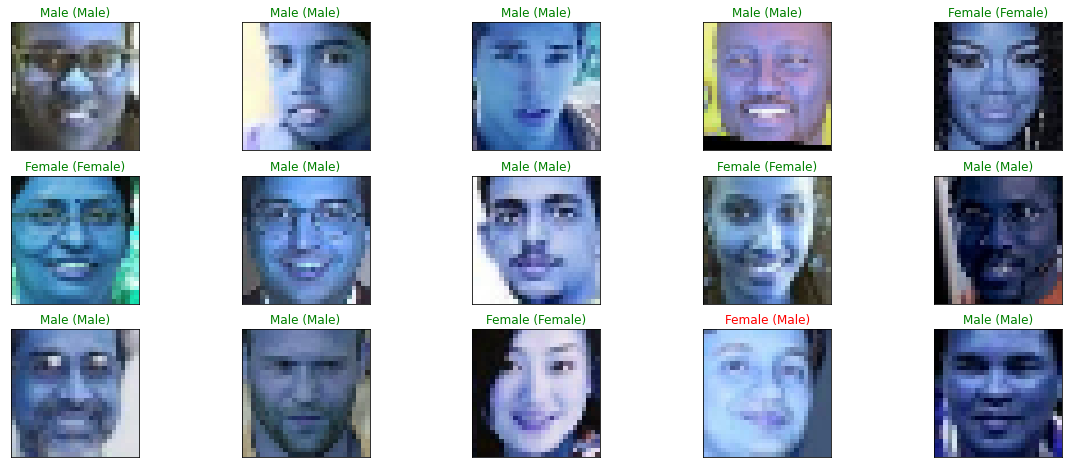

In [26]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()
